In [2]:
# ===============================================================
# STEP 1: Import Required Libraries
# ===============================================================
import pandas as pd
import numpy as np

# ===============================================================
# STEP 2: Load the Dataset (Update path if needed)
# ===============================================================
df = pd.read_csv(r"C:\Users\kpbha\Downloads\retail_data_2024.csv", parse_dates=['Date'])
print("✅ Dataset Loaded Successfully!\n")
print("Rows, Columns:", df.shape)
print("\nSample Preview:\n")
display(df.head())

# ===============================================================
# STEP 3: Basic Info
# ===============================================================
print("\n--- Dataset Info ---")
print(df.info())

# ===============================================================
# STEP 4: Check for Missing or Duplicate Data
# ===============================================================
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# ===============================================================
# STEP 5: Handle Missing or Duplicate Data
# ===============================================================
# Drop duplicates (if any)
df = df.drop_duplicates()

# Fill missing numerical values with median, categorical with mode
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# ===============================================================
# STEP 6: Create Derived Columns
# ===============================================================
# Profit = Selling Price – Cost
df['Profit'] = df['Price'] - df['Cost']

# Profit Margin (%)
df['Profit_Margin_%'] = ((df['Profit'] / df['Price']) * 100).round(2)

# ===============================================================
# STEP 7: Verify Cleaned Data
# ===============================================================
print("\n✅ Data Cleaning Completed Successfully!\n")
print("Cleaned Dataset Shape:", df.shape)
print("\nPreview of Cleaned Data:\n")
display(df.head())

# ===============================================================
# STEP 8: Save Cleaned Dataset
# ===============================================================
df.to_csv(r"C:\Users\kpbha\Downloads\retail_data_cleaned.csv", index=False)
print("💾 Cleaned dataset saved as: C:\\Users\\kpbha\\Downloads\\retail_data_cleaned.csv")


✅ Dataset Loaded Successfully!

Rows, Columns: (800, 9)

Sample Preview:



,Transaction_ID,Date,Region,Category,Sub_Category,Quantity,Price,Cost,Inventory_Days
0,1,2024-10-14,South,Furniture,Tables,9,1130.18,819.92,9
1,2,2024-10-28,West,Electronics,Mobiles,6,1963.39,1601.69,12
2,3,2024-11-30,South,Fashion,Men,6,1763.03,1409.28,20
3,4,2024-04-11,West,Grocery,Snacks,8,1128.05,894.58,15
4,5,2024-10-23,West,Fashion,Men,4,1431.99,1045.11,14



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  800 non-null    int64         
 1   Date            800 non-null    datetime64[ns]
 2   Region          800 non-null    object        
 3   Category        800 non-null    object        
 4   Sub_Category    800 non-null    object        
 5   Quantity        800 non-null    int64         
 6   Price           800 non-null    float64       
 7   Cost            800 non-null    float64       
 8   Inventory_Days  800 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 56.4+ KB
None

Missing Values:
 Transaction_ID    0
Date              0
Region            0
Category          0
Sub_Category      0
Quantity          0
Price             0
Cost              0
Inventory_Days    0
dtype: int64

Dup

C:\Users\kpbha\AppData\Local\Temp\ipykernel_17844\129579433.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\kpbha\AppData\Local\Temp\ipykernel_17844\129579433.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,Transaction_ID,Date,Region,Category,Sub_Category,Quantity,Price,Cost,Inventory_Days,Profit,Profit_Margin_%
0,1,2024-10-14,South,Furniture,Tables,9,1130.18,819.92,9,310.26,27.45
1,2,2024-10-28,West,Electronics,Mobiles,6,1963.39,1601.69,12,361.70,18.42
2,3,2024-11-30,South,Fashion,Men,6,1763.03,1409.28,20,353.75,20.06
3,4,2024-04-11,West,Grocery,Snacks,8,1128.05,894.58,15,233.47,20.70
4,5,2024-10-23,West,Fashion,Men,4,1431.99,1045.11,14,386.88,27.02


💾 Cleaned dataset saved as: C:\Users\kpbha\Downloads\retail_data_cleaned.csv


In [3]:
# ===============================================================
# STEP 3: SQL-Style Analysis using Pandas
# ===============================================================

import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\kpbha\Downloads\retail_data_cleaned.csv")

print("✅ Cleaned Data Loaded for SQL-style Analysis\n")

# ---------------------------------------------------------------
# 1️⃣ Total Profit by Category
# ---------------------------------------------------------------
category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
print("🧾 Total Profit by Category:\n", category_profit, "\n")

# ---------------------------------------------------------------
# 2️⃣ Profit Margin by Sub-Category
# ---------------------------------------------------------------
subcat_margin = df.groupby("Sub_Category")["Profit_Margin_%"].mean().sort_values(ascending=False)
print("💰 Average Profit Margin (%) by Sub-Category:\n", subcat_margin, "\n")

# ---------------------------------------------------------------
# 3️⃣ Region-wise Performance
# ---------------------------------------------------------------
region_summary = df.groupby("Region")[["Profit", "Quantity", "Price"]].agg({
    "Profit": "sum",
    "Quantity": "sum",
    "Price": "mean"
}).round(2)
print("🌍 Region-wise Summary:\n", region_summary, "\n")

# ---------------------------------------------------------------
# 4️⃣ Monthly Sales Trend
# ---------------------------------------------------------------
df["Month"] = pd.to_datetime(df["Date"]).dt.to_period("M")
monthly_sales = df.groupby("Month")["Profit"].sum()
print("📅 Monthly Profit Trend:\n", monthly_sales, "\n")

# ---------------------------------------------------------------
# 5️⃣ Identify Slow-Moving Items (High Inventory Days, Low Profit)
# ---------------------------------------------------------------
slow_items = df[(df["Inventory_Days"] > 15) & (df["Profit_Margin_%"] < 15)]
print("🐢 Slow-Moving Items (Top 5):")
display(slow_items.head())

# Save summary results
region_summary.to_csv(r"C:\Users\kpbha\Downloads\region_summary.csv")
print("\n💾 Region Summary saved as: C:\\Users\\kpbha\\Downloads\\region_summary.csv")


✅ Cleaned Data Loaded for SQL-style Analysis

🧾 Total Profit by Category:
 Category
Beauty         52466.04
Furniture      45224.96
Electronics    42694.64
Grocery        42314.30
Fashion        40954.93
Name: Profit, dtype: float64 

💰 Average Profit Margin (%) by Sub-Category:
 Sub_Category
Men          22.286286
Makeup       21.793708
Tables       20.837234
Women        20.761667
Snacks       20.710789
Skincare     20.441319
Laptops      20.353125
Mobiles      20.296974
Chairs       20.123699
Beverages    18.773529
Name: Profit_Margin_%, dtype: float64 

🌍 Region-wise Summary:
           Profit  Quantity    Price
Region                             
East    61213.87      1131  1339.26
North   46217.89      1041  1220.84
South   53300.31      1068  1319.50
West    62922.80      1152  1361.27 

📅 Monthly Profit Trend:
 Month
2024-01    19063.71
2024-02    15381.19
2024-03    19832.13
2024-04    18929.87
2024-05    17374.03
2024-06    19706.92
2024-07    20819.76
2024-08    12872.50
202

,Transaction_ID,Date,Region,Category,Sub_Category,Quantity,Price,Cost,Inventory_Days,Profit,Profit_Margin_%,Month
5,6,2024-09-01,East,Fashion,Women,3,1095.35,967.58,39,127.77,11.66,2024-09
8,9,2024-12-14,West,Grocery,Beverages,7,771.13,690.89,48,80.24,10.41,2024-12
9,10,2024-11-02,East,Fashion,Women,2,825.58,710.35,37,115.23,13.96,2024-11
11,12,2024-04-17,North,Fashion,Women,1,829.13,740.20,28,88.93,10.73,2024-04
13,14,2024-09-22,North,Fashion,Women,6,1034.07,972.16,53,61.91,5.99,2024-09



💾 Region Summary saved as: C:\Users\kpbha\Downloads\region_summary.csv


✅ Data ready for correlation and visualization

📈 Correlation between Inventory Days and Profit Margin: -0.04



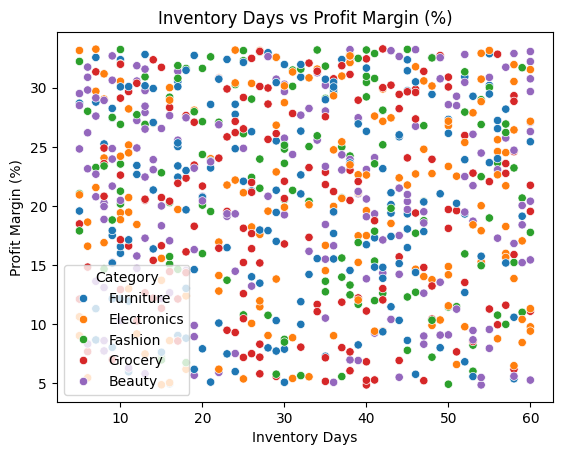

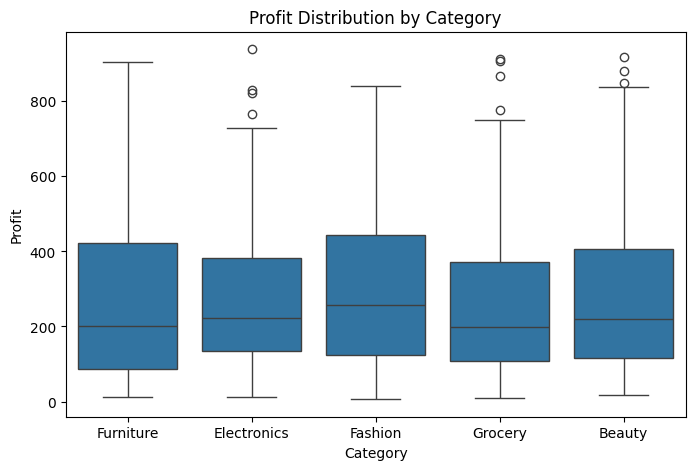

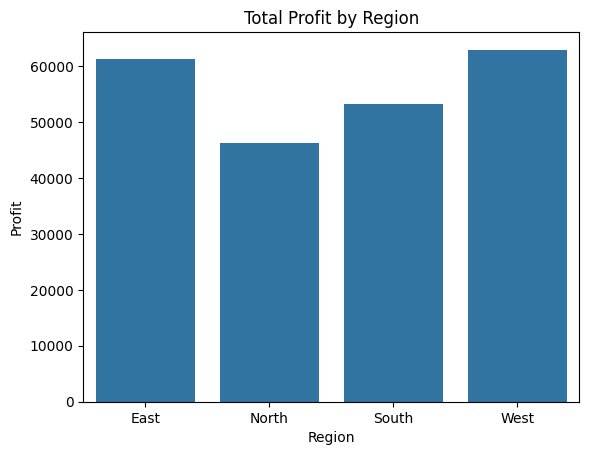

💾 Correlation summary saved in: C:\Users\kpbha\Downloads\correlation_summary.txt


In [4]:
# ===============================================================
# STEP 4: Correlation & Visualization
# ===============================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv(r"C:\Users\kpbha\Downloads\retail_data_cleaned.csv")

print("✅ Data ready for correlation and visualization\n")

# ---------------------------------------------------------------
# 1️⃣ Correlation between Inventory Days and Profit Margin
# ---------------------------------------------------------------
corr_value = df["Inventory_Days"].corr(df["Profit_Margin_%"])
print(f"📈 Correlation between Inventory Days and Profit Margin: {corr_value:.2f}\n")

# ---------------------------------------------------------------
# 2️⃣ Visualize Correlation
# ---------------------------------------------------------------
sns.scatterplot(data=df, x="Inventory_Days", y="Profit_Margin_%", hue="Category")
plt.title("Inventory Days vs Profit Margin (%)")
plt.xlabel("Inventory Days")
plt.ylabel("Profit Margin (%)")
plt.show()

# ---------------------------------------------------------------
# 3️⃣ Category-Wise Profit Distribution
# ---------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Category", y="Profit")
plt.title("Profit Distribution by Category")
plt.show()

# ---------------------------------------------------------------
# 4️⃣ Regional Profit Comparison
# ---------------------------------------------------------------
region_profit = df.groupby("Region")["Profit"].sum().reset_index()
sns.barplot(data=region_profit, x="Region", y="Profit")
plt.title("Total Profit by Region")
plt.show()

# ---------------------------------------------------------------
# 5️⃣ Save Correlation Insights
# ---------------------------------------------------------------
with open(r"C:\Users\kpbha\Downloads\correlation_summary.txt", "w") as f:
    f.write(f"Correlation between Inventory Days and Profit Margin: {corr_value:.2f}")
print("💾 Correlation summary saved in: C:\\Users\\kpbha\\Downloads\\correlation_summary.txt")
